<a href="https://colab.research.google.com/github/NSprogram3/DeepLearning/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip install pandas

Mounted at /content/gdrive


In [3]:
import tensorflow as tf                       # deep learning library
import numpy as np                            # for matrix operations
import matplotlib.pyplot as plt               # for visualization


In [4]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print("There are ", len(X_train), "images in the training dataset")
    # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")
   # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[0].shape

(28, 28)

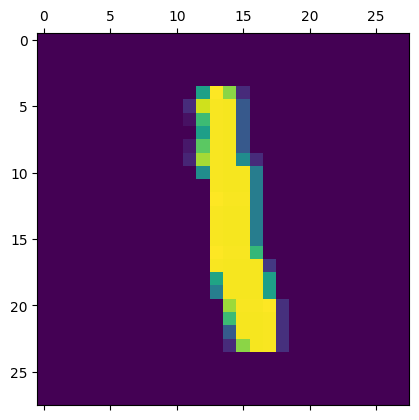

In [41]:
plt.matshow(X_train[6])

In [8]:
# we can use y_train to cross check
y_train[0]

5

In [9]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
np.unique(y_train) #number of class.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

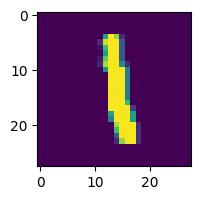

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[6,:,:])
plt.show()

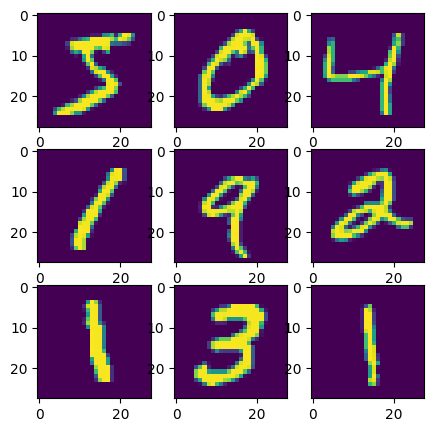

In [12]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i,:,:])

In [13]:
X_train = X_train.reshape((60000, 28,28, 1))
X_train = X_train.astype('float32') / 255 #Normalizing

In [14]:
x_test_flatted = X_test.reshape((10000, 28,28, 1))
x_test_flatted = X_test.astype('float32') / 255

In [15]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
from keras import layers
from keras import models

In [17]:
cnn = models.Sequential()
#feature extraction
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

#fully connected layer

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [19]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn.fit(X_train,y_train, epochs=3, batch_size=10)

Epoch 1/3
6000/6000 [==============================] - 76s 12ms/step - loss: 0.1174 - accuracy: 0.9645
Epoch 2/3
6000/6000 [==============================] - 73s 12ms/step - loss: 0.0471 - accuracy: 0.9868
Epoch 3/3
6000/6000 [==============================] - 76s 13ms/step - loss: 0.0383 - accuracy: 0.9901


In [23]:
test_loss, test_acc = cnn.evaluate(x_test_flatted,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0477 - accuracy: 0.9892


In [24]:
test_acc

0.9891999959945679

In [25]:
y_pred= cnn.predict(x_test_flatted)

313/313 [==============================] - 4s 11ms/step


In [30]:
#y_pred = np.argmax(np.round(y_pred), axis=1)

In [31]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
y_test = np.argmax(np.round(y_test), axis=1)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [43]:
for i in range(0,10):
  print(y_pred[i], y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, y_pred))

[[ 970    0    1    0    1    2    4    2    0    0]
 [   0 1132    0    2    0    0    0    0    0    1]
 [   1    3 1016    1    0    0    3    7    1    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    0    0  975    0    3    0    0    4]
 [   1    0    0    4    0  885    1    1    0    0]
 [   1    2    0    0    1    5  949    0    0    0]
 [   0    1    3    1    1    0    0 1020    0    2]
 [   2    2    2    3    1    8    3    1  951    1]
 [   2    2    0    0    8    6    1    1    1  988]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

